In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix


%matplotlib inline

In [35]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


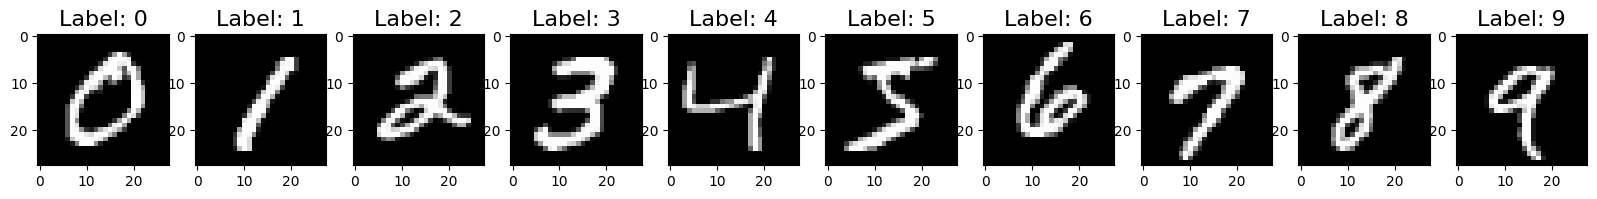

In [37]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [38]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [39]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Obrabianie danych:

In [40]:
#Normalize Data
x_train = x_train /255.0
x_test = x_test/255.0

In [41]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [42]:
# MODEL

model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

c:\Users\SKRZEP\Desktop\MNIST\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train

In [43]:
batch_size = 512
epochs= 30
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8292 - loss: 0.5956
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - loss: 0.2226
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.1602
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1276
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9702 - loss: 0.1018
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.0885
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9782 - loss: 0.0758
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9804 - loss: 0.0658
Epoch 9/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0577
Epoch 10/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0505
Epoch 11/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 0.0466
Epoch 12/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

EVALUATE

In [44]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("TEST LOSS: {}, TEST ACCCURACY: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.9794 - loss: 0.0822
TEST LOSS: 0.08224765211343765, TEST ACCCURACY: 0.9793999791145325


In [45]:
y_prep = model.predict(x_test)
y_prep_classes = np.argmax(y_prep, axis=1)
print(y_prep)
print(y_prep_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
[[1.6324220e-11 5.3705507e-09 2.3231873e-10 ... 1.0000000e+00
  8.6768369e-13 1.8579721e-08]
 [5.7608493e-12 1.5386765e-09 1.0000000e+00 ... 3.6735819e-14
  3.2818619e-09 2.1079695e-20]
 [5.1805760e-09 9.9996030e-01 2.0397085e-08 ... 3.0527019e-06
  1.9217590e-05 6.3501222e-09]
 ...
 [3.6763242e-17 1.1604365e-11 7.9258370e-18 ... 3.6450722e-09
  2.1082261e-13 2.4883168e-10]
 [2.8274209e-13 2.8213673e-12 2.3134082e-16 ... 5.4271231e-13
  2.0245567e-08 3.3514394e-13]
 [1.6312469e-13 1.9423919e-14 5.0677639e-12 ... 4.3526577e-16
  1.0513586e-15 1.3244031e-19]]
[7 2 1 ... 4 5 6]


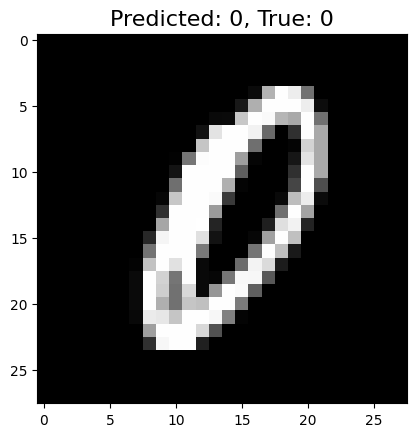

In [46]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_prep_class = y_prep_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_prep_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

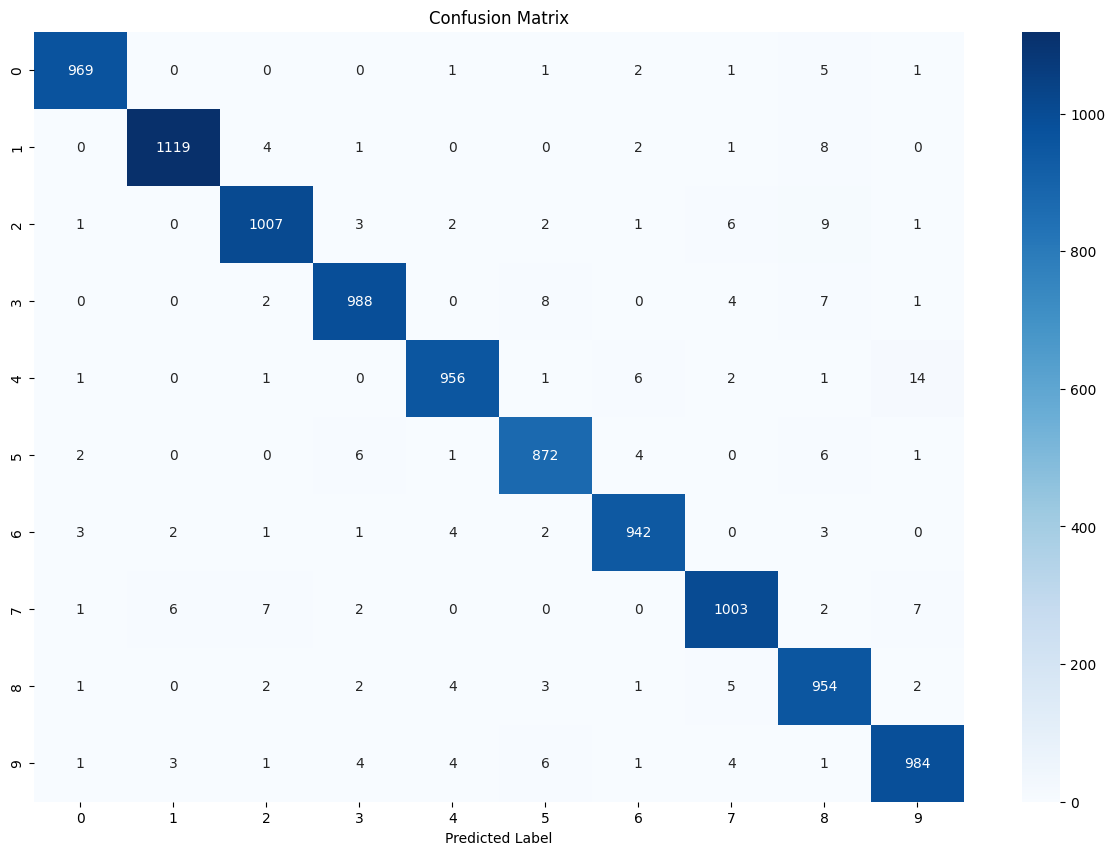

In [47]:
# Confusion Matrix

confusion_mtx = confusion_matrix(y_true, y_prep_classes)

#plot
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix')
